In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report,confusion_matrix

from keras.datasets import fashion_mnist
from keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,Dropout,Flatten,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

## Data Preprocessing

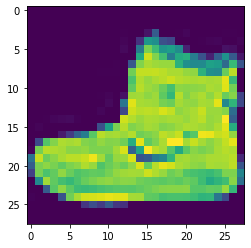

In [3]:
exp_img = x_train[0]
imshow(exp_img)

In [4]:
# Normalizing the x_train and x_test
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [5]:
# Reshaping the x_train and x_test to as (#ofdata,widht,height,color_channel)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
img_size= x_train.shape[1:]

In [6]:
# Conveting y_test and y_train to be one-hot encoded
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

## Model and Training

In [7]:
model = Sequential()

model.add(Convolution2D(filters=32,kernel_size=(4,4),
                        input_shape=(28, 28, 1),
                        activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(x_train,y_cat_train,epochs=10,
          validation_data=(x_test,y_cat_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 42s 704us/sample - loss: 0.4048 - accuracy: 0.8541 - val_loss: 0.3362 - val_accuracy: 0.8789
Epoch 2/10
60000/60000 [==============================] - 37s 614us/sample - loss: 0.2776 - accuracy: 0.8989 - val_loss: 0.3195 - val_accuracy: 0.8833
Epoch 3/10
60000/60000 [==============================] - 37s 614us/sample - loss: 0.2347 - accuracy: 0.9133 - val_loss: 0.2678 - val_accuracy: 0.9009
Epoch 4/10
60000/60000 [==============================] - 38s 641us/sample - loss: 0.2008 - accuracy: 0.9254 - val_loss: 0.2836 - val_accuracy: 0.8971
Epoch 5/10
60000/60000 [==============================] - 38s 629us/sample - loss: 0.1739 - accuracy: 0.9347 - val_loss: 0.2620 - val_accuracy: 0.9051
Epoch 6/10
60000/60000 [==============================] - 37s 613us/sample - loss: 0.1481 - accuracy: 0.9441 - val_loss: 0.2720 - val_accuracy: 0.9105
Epoch 7/10
60000/60000 [====================

## Model Evaluation

In [10]:
metrics = pd.DataFrame(model.history.history)

In [11]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.404803,0.854100,0.336230,0.8789
1,0.277599,0.898900,0.319482,0.8833
2,0.234732,0.913267,0.267773,0.9009
3,0.200783,0.925400,0.283570,0.8971
4,0.173859,0.934717,0.262023,0.9051
5,0.148136,0.944083,0.271956,0.9105
6,0.128287,0.952450,0.263364,0.9129
7,0.110801,0.958783,0.285974,0.9129
8,0.096008,0.963933,0.316588,0.9052
9,0.083171,0.969650,0.334645,0.9127


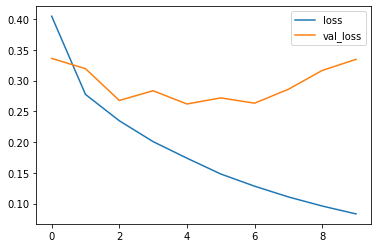

In [12]:
metrics[['loss','val_loss']].plot()

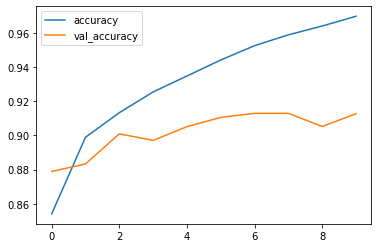

In [13]:
metrics[['accuracy','val_accuracy']].plot()

In [14]:
predictions = model.predict_classes(x_test)

(9.5, -0.5)

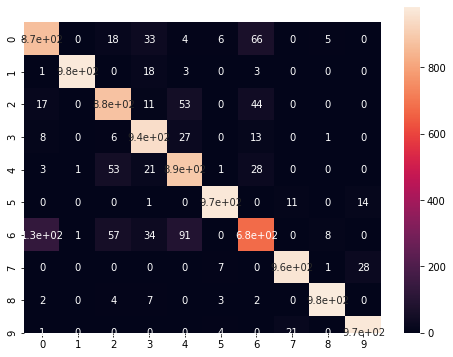

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.ylim(len(confusion_matrix(y_test,predictions))-0.5,-0.5)

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.86      0.88      0.87      1000
           3       0.88      0.94      0.91      1000
           4       0.83      0.89      0.86      1000
           5       0.98      0.97      0.98      1000
           6       0.81      0.68      0.74      1000
           7       0.97      0.96      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

